# Linear Discriminant Analysis on UCI Wine Dataset

Code based off [Iris LDA code by SETScholars](https://setscholars.net/how-to-implement-lda-in-python-with-scikit-learn/) 

In [2]:
from os.path import exists, join
from os import mkdir
import os
import kaggle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load Dataset

In [3]:
# Make sure datasets directory exists
if not exists('../datasets'):
    mkdir('../datasets')

# Download dataset
dataset_path = '../datasets/wine-supervised/'
if not exists(dataset_path):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('akhil0007/wine-data', dataset_path, unzip=True)

In [4]:
# Load dataset
df = pd.read_csv(join(dataset_path, 'wine.data'), header=None)

# Drop weird numbers
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

print(df.shape)

(178, 14)


# Test and Train Set Creation

In [5]:
# X is feature set, y is label set
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Proprocessing and Scaling

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Discriminant Analysis

In [7]:
num_components = 2
lda = LDA(n_components=num_components)
x = lda.fit_transform(X_train, y_train)

x = pd.DataFrame(x, columns=[f'LD{i+1}' for i in range(num_components)])
print(x.shape)

(142, 2)


Text(0, 0.5, 'LD2')

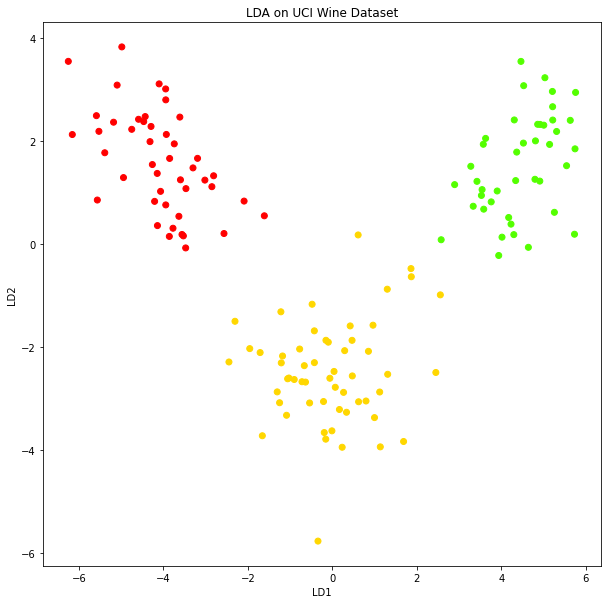

In [25]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x['LD1'], x['LD2'], c=y_train, cmap='prism')
plt.title('LDA on UCI Wine Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')

In [9]:
# This is the only code I could find for plotting decision boundaries, and idk how it's supposed to work
# https://www.analyticsvidhya.com/blog/2021/08/a-brief-introduction-to-linear-discriminant-analysis/

min1, max1 = x[:, 0].min() - 1, x[:, 0].max() + 1
min2, max2 = x[:, 1].min() - 1, x[:, 1].max() + 1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))

model = LDA()
model.fit(x, y)
yhat = model.predict(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Accent')

for class_value in range(3):
    row_ix = np.where(y == class_value)
    plt.scatter(x[row_ix, 0], x[row_ix, 1])


InvalidIndexError: (slice(None, None, None), 0)